# Fit Model


In [1]:
import pandas as pd
import mlutils
from sklearn import svm, metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [2]:
# column names
feature_col = "features" # feature vector
value_col = "foldClass" # fold class to be predicted

### Read data set with fold type classifications and feature vectors

In [3]:
df = pd.read_json("./features.json")

In [4]:
print("Total number of data:", df.shape[0], "\n")
df.head(2)

Total number of data: 5370 



,Exptl.,FreeRvalue,R-factor,alpha,beta,coil,features,foldClass,length,ngram,pdbChainId,resolution,secondary_structure,sequence
1,XRAY,0.26,0.19,0.469945,0.046448,0.483607,"[1.1960747496, -1.0387311627, 1.3750690176, 0....",alpha,366,"[SRM, RMP, MPS, PSP, SPP, PPM, PMP, MPV, PVP, ...",16VP.A,2.1,CCSCCCCCCCCHHHHHHHHHHHHTCTTHHHHHHHHHHCCCCCSTTS...,SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...
1000,XRAY,0.23,0.18,0.504630,0.004630,0.490741,"[0.9981168457, -1.0488222892, -0.0676322653000...",alpha,216,"[MEA, EAD, ADV, DVE, VEQ, EQQ, QQA, QAL, ALT, ...",1PBW.B,2.0,CCCCCCCCCCCCCCHHHHCCTTSCSCHHHHHHHHHHHHHHTTCTTT...,MEADVEQQALTLPDLAEQFAPPDIAPPLLIKLVEAIEKKGLECSTL...


## Split dataset into a training and test set

In [5]:
train, test = train_test_split(df, test_size=0.25, random_state=13, stratify=df[value_col])
print("Training set size:", train.shape[0], "\n")
print(train[value_col].value_counts())
print()
print("Test set size:", test.shape[0], "\n")
print(test[value_col].value_counts())

Training set size: 4027 

alpha         2107
alpha+beta    1266
beta           654
Name: foldClass, dtype: int64

Test set size: 1343 

alpha         703
alpha+beta    422
beta          218
Name: foldClass, dtype: int64


## Train a classifier

In [6]:
classifier = svm.SVC(gamma='auto', class_weight='balanced', random_state=13, probability=True)

classifier.fit(train[feature_col].tolist(), train[value_col])

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

## Make prediction for test set

In [7]:
predicted = classifier.predict(test[feature_col].tolist())
expected = test[value_col]

## Calculate metrics for test set

Classification metrics:

             precision    recall  f1-score   support

      alpha       0.86      0.81      0.83       703
 alpha+beta       0.67      0.70      0.68       422
       beta       0.70      0.77      0.73       218

avg / total       0.77      0.77      0.77      1343



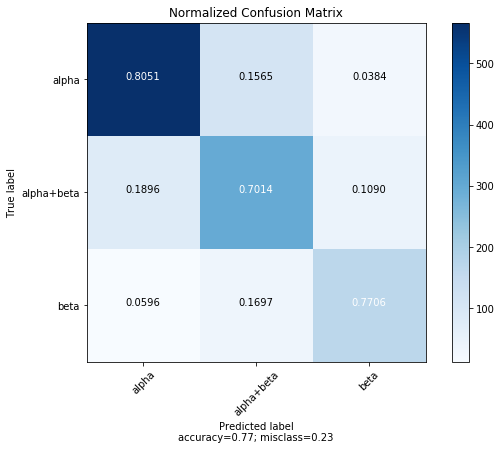

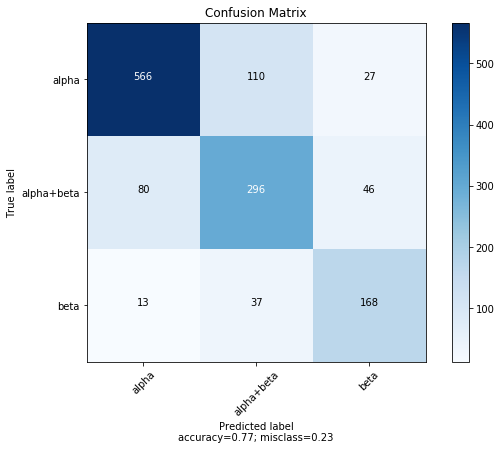

In [8]:
cm = metrics.confusion_matrix(expected, predicted)
print("Classification metrics:\n")
print(metrics.classification_report(expected, predicted))
mlutils.plot_confusion_matrix(cm, classifier.classes_, normalize=True, title='Normalized Confusion Matrix')
mlutils.plot_confusion_matrix(cm, classifier.classes_, normalize=False, title="Confusion Matrix")

## Save the Classifier Model

In [9]:
joblib.dump(classifier, "./classifier")

['./classifier']

## Next Step
After you saved the classifier model here, go back to the [0-Workflow.ipynb](./0-Workflow.ipynb) to run the next step of the analysis.